## Fifa 22 : Player Dataset


---

**A Sample:**
<img width="905" alt="Screenshot 2021-09-24 at 12 28 08 PM" src="https://user-images.githubusercontent.com/86509452/134633469-cf15d339-65e9-489f-b92e-6ddf2e3ba5fa.png">



---

<table>
<tr>

<tr>

<td>
    
    
| Face Stat         | Features |
| ----------------  |--------  |
| PACE              | Sprint Speed, Acceleration |
| SHOOTING          | Finishing, Volleys, Shot Power, Long Shots, Positioning, Penalties|
| PASSING           | Crossing, Short Passing, Long Passing, Curve, FreeKick Accuracy, Vision|
| DRIBBLING         | Dribbling, Ball Control, Agility, Reactions, Balance, Composure|
| DEFENDING         | Heading Accuracy, Marking, Stand Tackle, Slide Tackle, Interceptions| 
| PHYSICAL          | Jumping, Stamina, Strength, Aggression |
    


</td><td>


| Type of Player | Ideal set of positions | 
| ----------------- | ---------------------- |
| Attacking         | ST, CF, CAM, RAM, LAM, RF, LF, RS, LS, RW, LW|
| Midfield          | CDM, CM ,RCM, LCM, RDM, LDM |
| Defence           | GK, CB, RCB, LCB, LB, RB, LWB, RWB|

</td>    
    



---
### Objective : 
- Identify the ideal position of a player based on the attributes provided.
- To get a broader idea of the dataset for other characteristics ---> [Click Here](https://public.tableau.com/app/profile/eashwar.22/viz/Fifa22LeagueBattle/Story1)
---

**Steps to be followed:**

- [x] Data Preparation
- [x] Data Exploration
- [x] Generalisation of ANN Model
- [ ] Model Prediction
- [ ] Streamlit Deployment

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=1.2)



pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 30)

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE,RandomOverSampler
from pickle import dump,load

import warnings
warnings.filterwarnings("ignore")

In [44]:
# Load Dataset
df_orig = pd.read_csv('../Data/Raw_FIFA_22_data.csv',index_col=0).reset_index(drop=True)
df_orig.shape

(19239, 59)

In [45]:
df_orig.head()

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,League prestige,Continent
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,Paris Saint-Germain,French Ligue 1,1.0,RW,Argentina,Left,4,4,Medium/Low,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,Top 6 leagues,South America
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,Right,4,4,High/Medium,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,Top 6 leagues,Europe
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,Manchester United,English Premier League,1.0,ST,Portugal,Right,4,5,High/Low,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,Top 6 leagues,Europe
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,Paris Saint-Germain,French Ligue 1,1.0,LW,Brazil,Right,5,5,High/Medium,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,Top 6 leagues,South America
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,Manchester City,English Premier League,1.0,RCM,Belgium,Right,5,4,High/High,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,Top 6 leagues,Europe


In [46]:
df_orig.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'club_name', 'league_name', 'league_level',
       'club_position', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'work_rate', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_mark

- Drop unnecessary columns (these attributes aren't relevant to the analysis)
- We only focus on individual numerical stats and work rate in order to justify the player's position
> **Note:** <br>The '**player_positions**' column describes the multiple positions that a player can be allotted to. <br>For this analysis we only focus on Multi class classification so the column can be removed. 

In [79]:
columns_to_drop = ['short_name', 'player_positions', 'overall', 'potential',
                  'value_eur', 'wage_eur', 'age', 'club_name', 'league_name', 
                   'league_level','nationality_name','preferred_foot','weak_foot',
                   'skill_moves','release_clause_eur','League prestige','Continent',
                   ]
data = df_orig.drop(columns=columns_to_drop)
data.shape

(19239, 42)

In [80]:
data.head()

,club_position,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,RW,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,ST,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,ST,High/Low,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,LW,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,RCM,High/High,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13


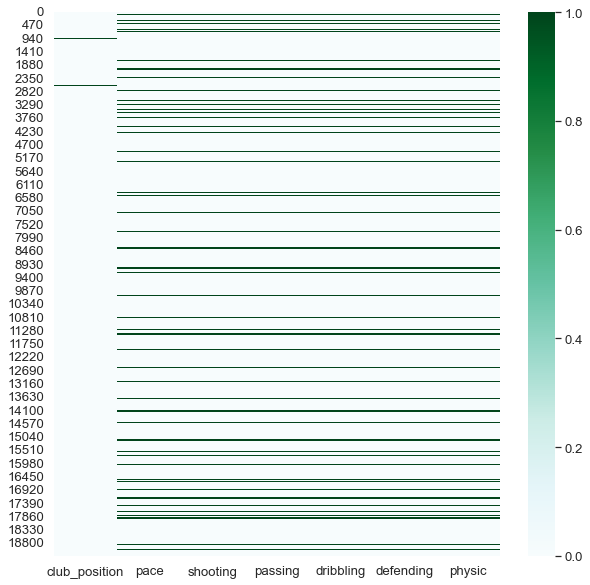

In [81]:
# Look for missing values

s = data.isnull().sum()
missing_cols=list(s[s>0].index)

plt.figure(figsize=(10,10))
sns.heatmap(data[missing_cols].isnull(),cmap='BuGn');


In [82]:
data[data.pace.isnull()].club_position.unique()

array(['GK', 'SUB', 'RES', nan], dtype=object)

- It appears that goalkeepers, subs and reserves don't contribute to outfield stats.
- We can remove these 3 positions from the analysis

In [83]:
data = data[~data.club_position.isin(['SUB', 'RES', np.nan,'GK'])].reset_index(drop=True)
data=data.drop(['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
           'goalkeeping_positioning','goalkeeping_reflexes'],axis=1)

data.isnull().sum().sum()

0

Now that there are no missing values, the work rate column has to be encoded with dummy variables


In [84]:
''' Save the Processed File'''
# data.to_csv('../Data/Processed_FIFA_22_data.csv')

' Save the Processed File'

In [85]:
workrate_encoded = pd.get_dummies(data['work_rate'],drop_first=True) 
workrate_encoded

,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7005,0,0,0,0,0,0,0,1
7006,0,1,0,0,0,0,0,0
7007,0,0,0,0,0,0,0,1
7008,0,0,0,1,0,0,0,0


In [86]:
# Joining One Hot encoded work rate with new dataset
data_new = pd.concat([data.drop(['work_rate'],axis=1),workrate_encoded],axis=1)
data_new.head()

,club_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,RW,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,0,0,0,0,0,0,1,0
1,ST,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,0,1,0,0,0,0,0,0
2,ST,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,1,0,0,0,0,0,0,0
3,LW,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,0,1,0,0,0,0,0,0
4,RCM,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,0,0,0,0,0,0,0,0


- There is a loss of almost 65% of original data. 
- As long as they are irrelevant the analysis shouldn't be affected significantly.

In [87]:
data_new.shape,df_orig.shape

((7010, 44), (19239, 59))

In [88]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   club_position                7010 non-null   object 
 1   pace                         7010 non-null   float64
 2   shooting                     7010 non-null   float64
 3   passing                      7010 non-null   float64
 4   dribbling                    7010 non-null   float64
 5   defending                    7010 non-null   float64
 6   physic                       7010 non-null   float64
 7   attacking_crossing           7010 non-null   int64  
 8   attacking_finishing          7010 non-null   int64  
 9   attacking_heading_accuracy   7010 non-null   int64  
 10  attacking_short_passing      7010 non-null   int64  
 11  attacking_volleys            7010 non-null   int64  
 12  skill_dribbling              7010 non-null   int64  
 13  skill_curve       

In [89]:
def return_actual_position(x):
    if x in ['RCB','LCB']:
        return 'CB'
    elif x in ['RCM','LCM']:
        return 'CM'
    elif x in ['RDM','LDM','CDM']:
        return 'DM'
    elif x in ['LAM','RAM','CAM']:
        return 'AM'
    elif x in ['RS','LS','CF','RF','LF']:
        return 'ST'
    elif x in ['RW','RWB']:
        return 'RM'
    elif x in ['LW','LWB']:
        return 'LM'
    else:
        
        return x

map_position={i:return_actual_position(i) for i in  data_new.club_position.unique()}
data_new.club_position = data_new.club_position.map(map_position)

For **Sequential API** we need to classify the positions (Labels) into **sparse numeric categories**, starting from 0.

In [90]:
# Convert class names to label encoded values starting from 0

class_labels=sorted(list(data_new.club_position.unique()))
class_numbers=np.arange(0,len(class_labels))
map_label = dict(zip(class_labels,class_numbers))

data_to_model = data_new.copy()
data_to_model.club_position = data_to_model.club_position.map(map_label)
map_label

{'AM': 0,
 'CB': 1,
 'CM': 2,
 'DM': 3,
 'LB': 4,
 'LM': 5,
 'RB': 6,
 'RM': 7,
 'ST': 8}

In [91]:
# Final Data used to train the model
print("Shape : ",data_to_model.shape)

data_to_model.head()


Shape :  (7010, 44)


,club_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,7,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,0,0,0,0,0,0,1,0
1,8,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,0,1,0,0,0,0,0,0
2,8,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,1,0,0,0,0,0,0,0
3,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,0,1,0,0,0,0,0,0
4,2,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,0,0,0,0,0,0,0,0


---
## Exploring the Attributes

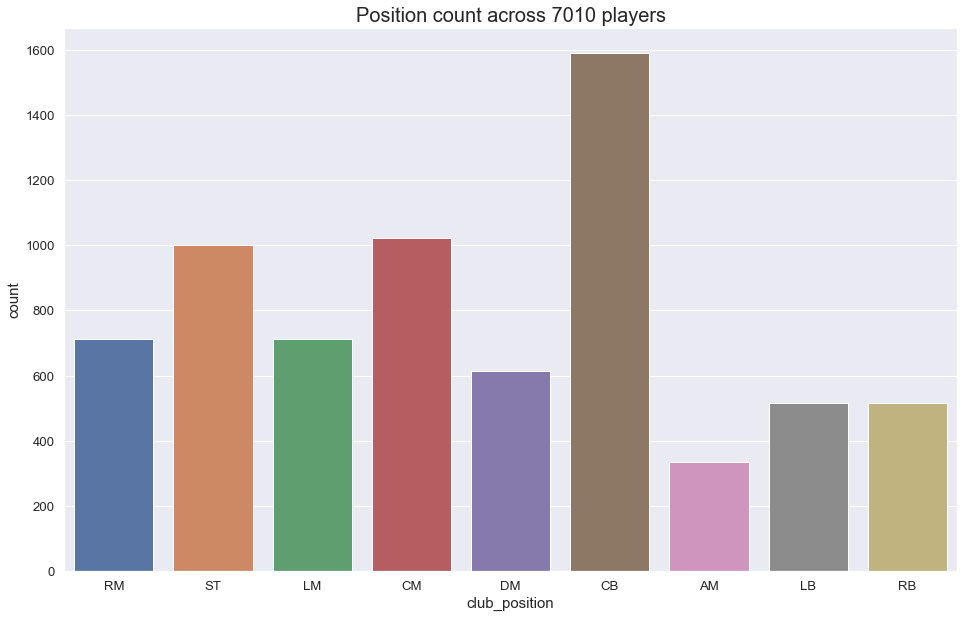

In [92]:
plt.figure(figsize=(16,10))
plt.title(f"Position count across {data_new.shape[0]} players",size=20)
plt.xlabel("",size=15)
plt.ylabel("",size=15)

sns.countplot(data_new.club_position);

In [93]:
data_new.club_position.value_counts()

CB    1588
CM    1023
ST     999
RM     711
LM     711
DM     614
LB     515
RB     515
AM     334
Name: club_position, dtype: int64

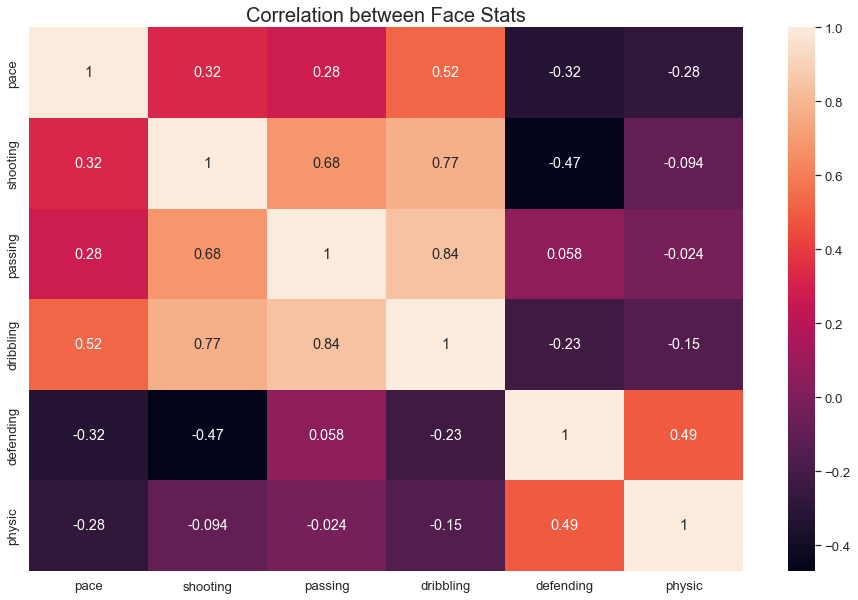

In [94]:

plt.figure(figsize=(16,10))
plt.title("Correlation between Face Stats",size=20)
sns.heatmap(data_to_model[['pace','shooting','passing','dribbling','defending','physic']].corr(),
           annot=True);

In [95]:
# now face stats aren't required for analysis
data_to_model=data_to_model.drop(['pace','shooting','passing','dribbling','defending','physic'],axis=1) 

In [161]:
X = data_to_model.copy()
y = X.pop('club_position')

X_save=X.copy()
y_save=y.copy()

X=np.array(X)
y=np.array(y)

scaler = MinMaxScaler()
X=scaler.fit_transform(X)
# dump(scaler, open('../Models/scaler.pkl', 'wb'))


X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y,
                                                 test_size=0.3)

smt = SMOTE(sampling_strategy='minority',
            random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5785, 37), (2103, 37), (5785,), (2103,))

In [103]:
model = keras.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(37,)),
    keras.layers.Dropout(rate=0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(9,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [104]:
EPOCHS=150

history=model.fit(X_train,
                  y_train,
                  epochs=EPOCHS,
                  verbose=1,
                  validation_data=(X_test,y_test))

Train on 5785 samples, validate on 2103 samples
Epoch 1/150
5785/5785 [==============================] - 4s 706us/sample - loss: 1.7334 - accuracy: 0.4185 - val_loss: 1.8199 - val_accuracy: 0.2948
Epoch 2/150
5785/5785 [==============================] - 2s 405us/sample - loss: 1.4290 - accuracy: 0.4812 - val_loss: 1.3455 - val_accuracy: 0.4456
Epoch 3/150
5785/5785 [==============================] - 2s 405us/sample - loss: 1.3130 - accuracy: 0.5087 - val_loss: 1.3617 - val_accuracy: 0.4337
Epoch 4/150
5785/5785 [==============================] - 2s 405us/sample - loss: 1.2752 - accuracy: 0.5277 - val_loss: 1.1494 - val_accuracy: 0.5245
Epoch 5/150
5785/5785 [==============================] - 2s 401us/sample - loss: 1.2362 - accuracy: 0.5296 - val_loss: 1.2353 - val_accuracy: 0.5121
Epoch 6/150
5785/5785 [==============================] - 2s 399us/sample - loss: 1.2089 - accuracy: 0.5492 - val_loss: 1.2057 - val_accuracy: 0.4936
Epoch 7/150
5785/5785 [==============================] - 2

5785/5785 [==============================] - 2s 406us/sample - loss: 1.0198 - accuracy: 0.5972 - val_loss: 1.0893 - val_accuracy: 0.5483
Epoch 56/150
5785/5785 [==============================] - 2s 403us/sample - loss: 1.0233 - accuracy: 0.6066 - val_loss: 1.0661 - val_accuracy: 0.5649
Epoch 57/150
5785/5785 [==============================] - 3s 475us/sample - loss: 1.0405 - accuracy: 0.5986 - val_loss: 1.0854 - val_accuracy: 0.5554
Epoch 58/150
5785/5785 [==============================] - 2s 416us/sample - loss: 1.0289 - accuracy: 0.5953 - val_loss: 1.1305 - val_accuracy: 0.5369
Epoch 59/150
5785/5785 [==============================] - 3s 493us/sample - loss: 1.0418 - accuracy: 0.5965 - val_loss: 1.0880 - val_accuracy: 0.5559
Epoch 60/150
5785/5785 [==============================] - 3s 444us/sample - loss: 1.0294 - accuracy: 0.5976 - val_loss: 1.1441 - val_accuracy: 0.5397
Epoch 61/150
5785/5785 [==============================] - 3s 464us/sample - loss: 1.0248 - accuracy: 0.5952 - val

5785/5785 [==============================] - 3s 469us/sample - loss: 0.9687 - accuracy: 0.6268 - val_loss: 1.1089 - val_accuracy: 0.5525
Epoch 110/150
5785/5785 [==============================] - 3s 478us/sample - loss: 0.9771 - accuracy: 0.6152 - val_loss: 1.0927 - val_accuracy: 0.5478
Epoch 111/150
5785/5785 [==============================] - 3s 482us/sample - loss: 1.0015 - accuracy: 0.6182 - val_loss: 1.0915 - val_accuracy: 0.5516
Epoch 112/150
5785/5785 [==============================] - 3s 444us/sample - loss: 0.9766 - accuracy: 0.6204 - val_loss: 1.0985 - val_accuracy: 0.5525
Epoch 113/150
5785/5785 [==============================] - 2s 425us/sample - loss: 0.9786 - accuracy: 0.6245 - val_loss: 1.0995 - val_accuracy: 0.5516
Epoch 114/150
5785/5785 [==============================] - 2s 396us/sample - loss: 0.9864 - accuracy: 0.6226 - val_loss: 1.0549 - val_accuracy: 0.5673
Epoch 115/150
5785/5785 [==============================] - 2s 424us/sample - loss: 0.9876 - accuracy: 0.6178

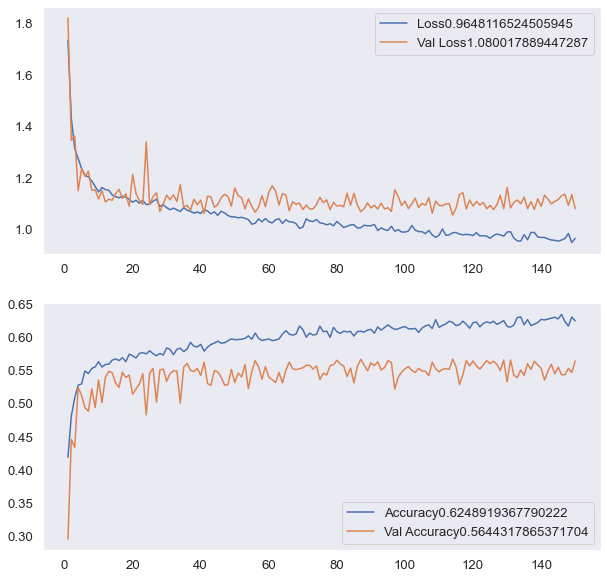

In [105]:
df = pd.DataFrame(history.history)
fig,ax=plt.subplots(2,1,figsize=(10,10))



ax[0].plot(np.arange(1,EPOCHS+1),
           df['loss'],
           label='Loss'+str(df.iloc[-1]['loss']))
ax[0].plot(np.arange(1,EPOCHS+1),
         df['val_loss'],
         label='Val Loss'+str(df.iloc[-1]['val_loss']))
ax[0].legend()
ax[0].grid()
ax[1].plot(np.arange(1,EPOCHS+1),
           df['accuracy'],
           label='Accuracy'+str(df.iloc[-1]['accuracy']))
ax[1].plot(np.arange(1,EPOCHS+1),
         df['val_accuracy'],
         label='Val Accuracy'+str(df.iloc[-1]['val_accuracy']))
ax[1].legend()
ax[1].grid()

In [106]:
model.save('../Models/model_1')

INFO:tensorflow:Assets written to: ../Models/model_1/assets


In [28]:
X_save.columns

Index(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle', 'High/Low',
       'High/Medium', 'Low/High', 'Low/Low', 'Low/Medium', 'Medium/High',
       'Medium/Low', 'Medium/Medium'],
      dtype='object')

In [32]:
a={'a':1,'b':2}
a[1]=2

In [37]:
b=list(a.keys())

In [108]:
y_save.unique()

array([7, 8, 5, 2, 3, 1, 0, 4, 6])

In [159]:
index=9

out=tf.expand_dims(X_test[index],1)
out=tf.reshape(out,[1,37])
class_labels[np.argmax(model.predict(np.array(out)))],class_labels[y_test[index]]

('ST', 'ST')

In [141]:
X_test[:1].shape

(1, 37)

In [142]:
np.array(out).shape

(37, 1)